In [3]:
import pandas as pd

# sahi path do
df = pd.read_csv(r"D:\IPL__DATASET\archive\matches.csv")

print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (1095, 20)
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_d

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# ==============================
# 1. Load Dataset
# ==============================
df = pd.read_csv(r"D:\IPL__DATASET\archive\matches.csv")

# Target column
y = df["result"]

# Features (X) -> drop target & unwanted columns
X = df.drop(["result", "id", "date", "player_of_match", "umpire1", "umpire2"], axis=1)

# Encode categorical features
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Encode target y
le = LabelEncoder()
y = le.fit_transform(y)

# ==============================
# 2. Model
# ==============================
xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)

# ==============================
# 3. Cross Validation
# ==============================
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

results = cross_validate(xgb_clf, X, y, cv=kfold, scoring=scoring)

# ==============================
# 4. Print Results
# ==============================
print("Accuracy per fold :", results['test_accuracy'])
print("Precision per fold:", results['test_precision'])
print("Recall per fold   :", results['test_recall'])
print("F1 per fold       :", results['test_f1'])

print("\n✅ Mean Accuracy :", np.mean(results['test_accuracy']))
print("✅ Mean F1 Score :", np.mean(results['test_f1']))


c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy per fold : [0.91324201 0.89954338 0.89497717 0.91324201 0.86757991]
Precision per fold: [0.91558673 0.90753051 0.89435948 0.91853386 0.87035289]
Recall per fold   : [0.91324201 0.89954338 0.89497717 0.91324201 0.86757991]
F1 per fold       : [0.91281794 0.89844258 0.8921285  0.9124955  0.86668236]

✅ Mean Accuracy : 0.897716894977169
✅ Mean F1 Score : 0.8965133763343344


Accuracy : 0.897716894977169
Precision: 0.9019616975568862
Recall   : 0.897716894977169
F1 Score : 0.8969283483528033
MCC      : 0.8042973339985058

Classification Report:
               precision    recall  f1-score   support

   no result       1.00      0.80      0.89         5
        runs       0.94      0.83      0.88       498
         tie       1.00      1.00      1.00        14
     wickets       0.87      0.96      0.91       578

    accuracy                           0.90      1095
   macro avg       0.95      0.90      0.92      1095
weighted avg       0.90      0.90      0.90      1095



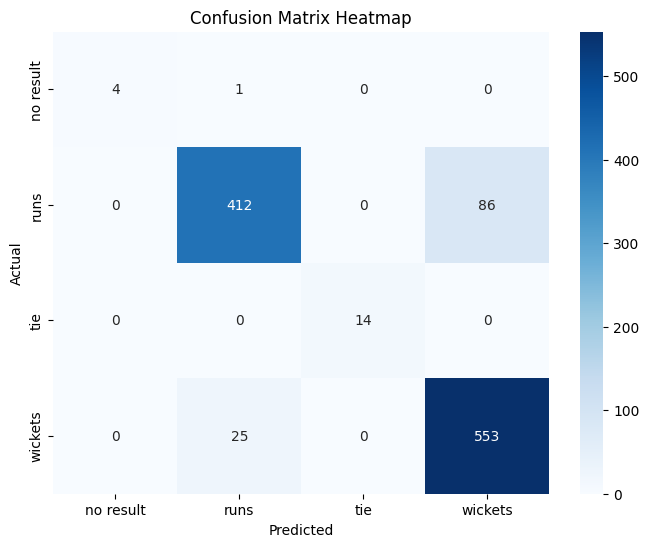

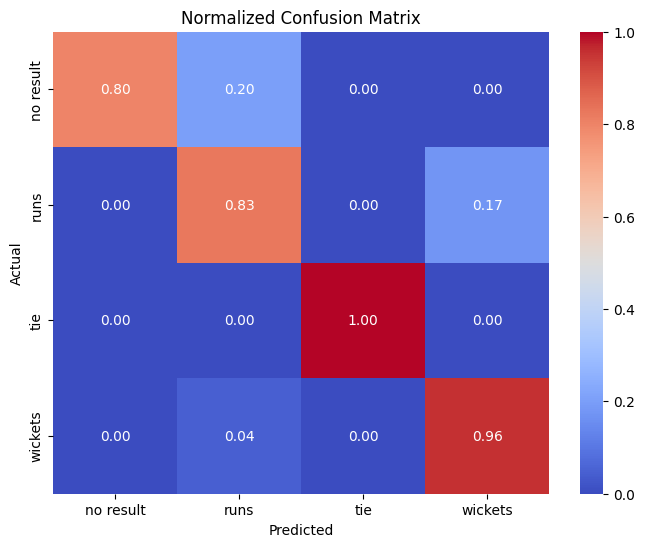

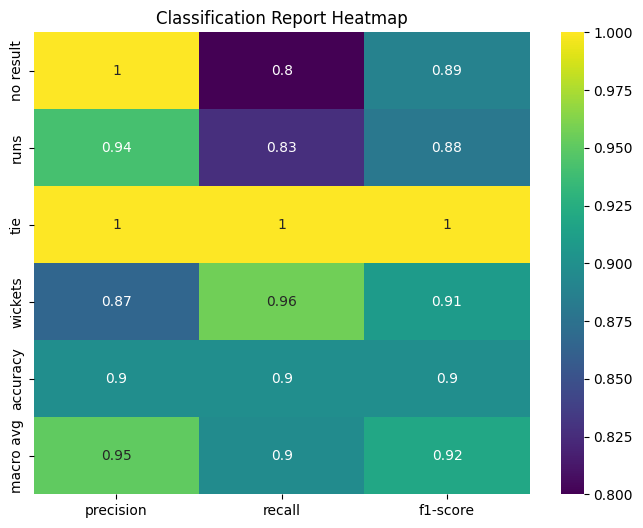

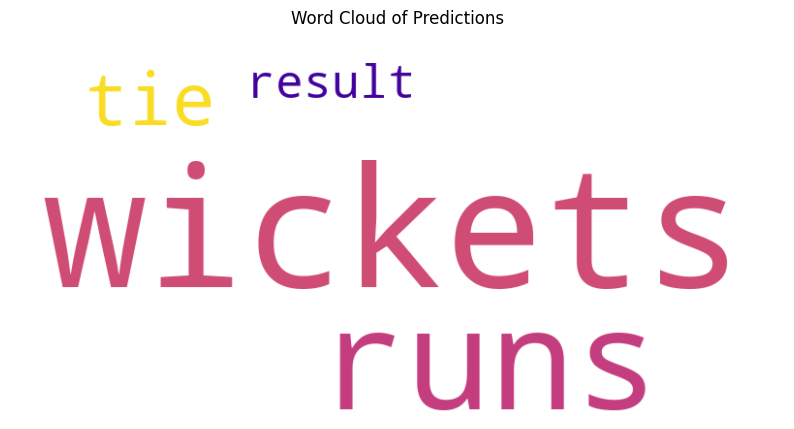

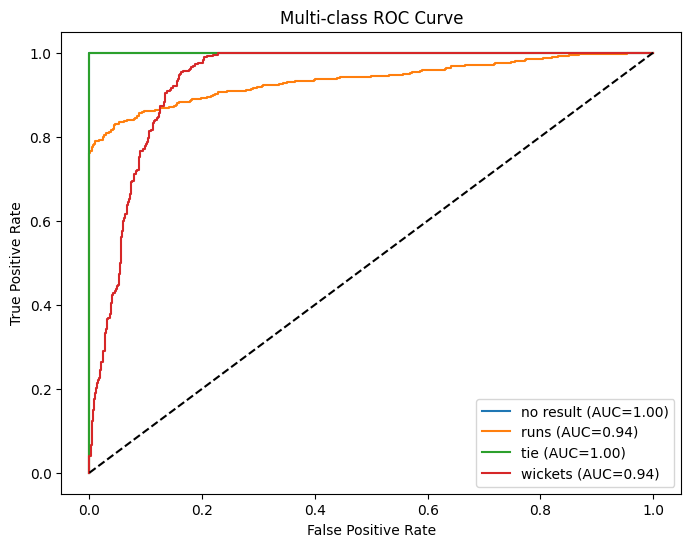

C:\Users\tarun\AppData\Local\Temp\ipykernel_852\92082485.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=le.inverse_transform(y_pred), palette="Set2")


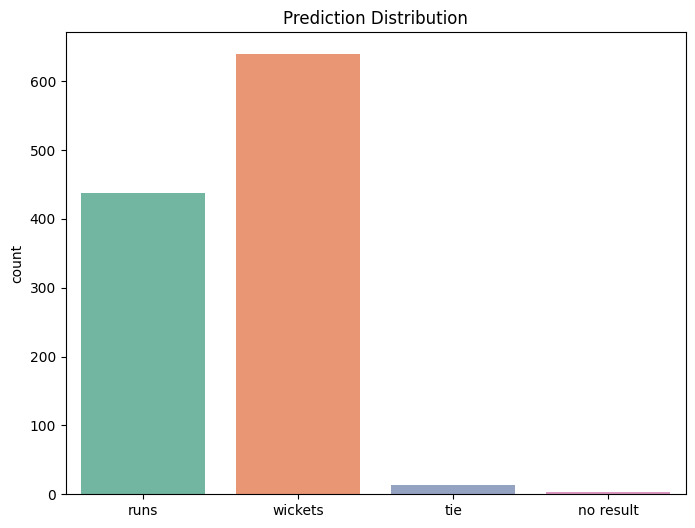

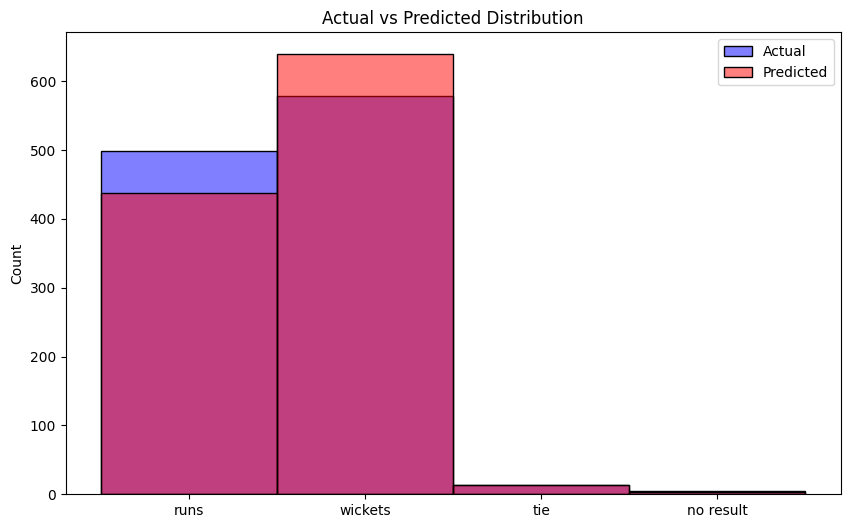

C:\Users\tarun\AppData\Local\Temp\ipykernel_852\92082485.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=mcc_per_class, palette="cool")


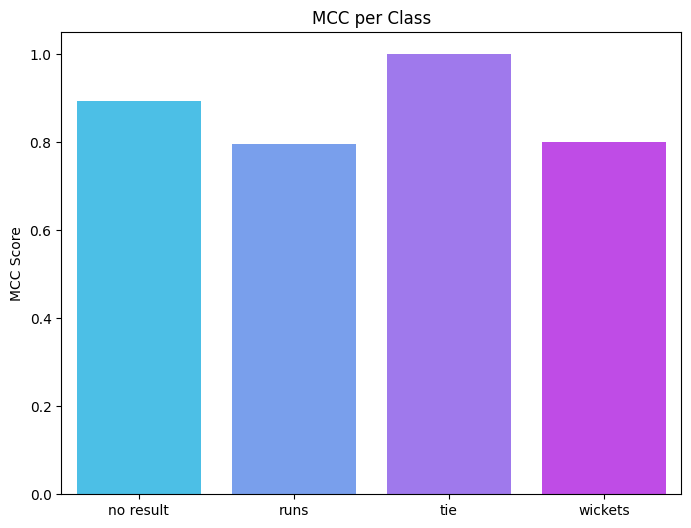

C:\Users\tarun\AppData\Local\Temp\ipykernel_852\92082485.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=acc_per_class, palette="magma")


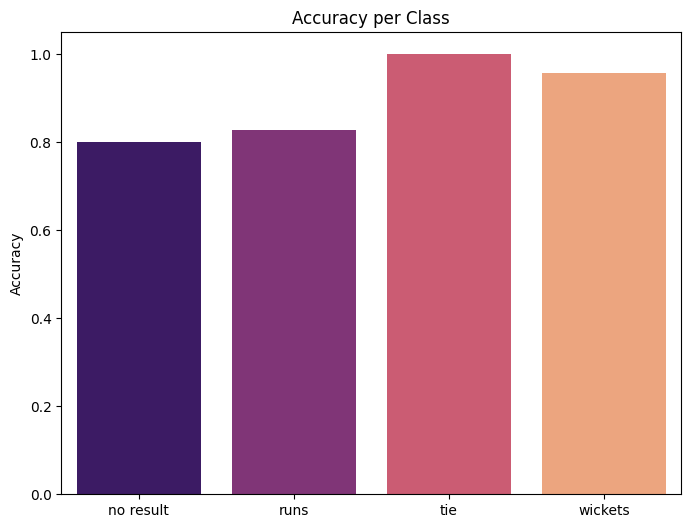

NameError: name 'xgb' is not defined

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, roc_curve, auc
)
from xgboost import XGBClassifier
from wordcloud import WordCloud
from sklearn.preprocessing import label_binarize

# ==============================
# 1. Load Dataset
# ==============================
df = pd.read_csv(r"D:\IPL__DATASET\archive\matches.csv")

y = df["result"]
X = df.drop(["result", "id", "date", "player_of_match", "umpire1", "umpire2"], axis=1)

# Encode categorical features
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# ==============================
# 2. Train Model with CV
# ==============================
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)

# Cross-validated predictions
y_pred = cross_val_predict(xgb_clf, X, y, cv=kfold, method="predict")
y_prob = cross_val_predict(xgb_clf, X, y, cv=kfold, method="predict_proba")

# ==============================
# 3. Metrics
# ==============================
print("Accuracy :", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred, average="weighted"))
print("Recall   :", recall_score(y, y_pred, average="weighted"))
print("F1 Score :", f1_score(y, y_pred, average="weighted"))
print("MCC      :", matthews_corrcoef(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=le.classes_))

cm = confusion_matrix(y, y_pred)
classes = le.classes_

# ==============================
# 4. 10 Advanced Visualizations
# ==============================

# 1️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2️⃣ Normalized Confusion Matrix
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=classes, yticklabels=classes)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3️⃣ Classification Report Heatmap
report = classification_report(y, y_pred, output_dict=True, target_names=classes)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(8,6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="viridis")
plt.title("Classification Report Heatmap")
plt.show()

# 4️⃣ WordCloud of Predictions
text = " ".join(map(str, le.inverse_transform(y_pred)))
wc = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Predictions")
plt.show()

# 5️⃣ ROC Curve (Multi-class)
y_bin = label_binarize(y, classes=np.arange(len(classes)))
plt.figure(figsize=(8,6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC={auc(fpr,tpr):.2f})")
plt.plot([0,1],[0,1],"k--")
plt.title("Multi-class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 6️⃣ Prediction Distribution
plt.figure(figsize=(8,6))
sns.countplot(x=le.inverse_transform(y_pred), palette="Set2")
plt.title("Prediction Distribution")
plt.show()

# 7️⃣ Actual vs Predicted Distribution
plt.figure(figsize=(10,6))
sns.histplot(le.inverse_transform(y), color="blue", alpha=0.5, label="Actual")
sns.histplot(le.inverse_transform(y_pred), color="red", alpha=0.5, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Distribution")
plt.show()

# 8️⃣ MCC per Class
mcc_per_class = []
for i in range(len(classes)):
    y_true_bin = (y == i).astype(int)
    y_pred_bin = (y_pred == i).astype(int)
    mcc_per_class.append(matthews_corrcoef(y_true_bin, y_pred_bin))
plt.figure(figsize=(8,6))
sns.barplot(x=classes, y=mcc_per_class, palette="cool")
plt.title("MCC per Class")
plt.ylabel("MCC Score")
plt.show()

# 9️⃣ Accuracy per Class
acc_per_class = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8,6))
sns.barplot(x=classes, y=acc_per_class, palette="magma")
plt.title("Accuracy per Class")
plt.ylabel("Accuracy")
plt.show()

# 🔟 Feature Importance (train once for visualization)
xgb_clf.fit(X, y)
xgb.plot_importance(xgb_clf, importance_type="weight", height=0.5, max_num_features=15)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()



Model Comparison:

                     Accuracy  F1 Score
Logistic Regression  0.194521  0.173194
Random Forest        0.549772  0.522572
SVM                  0.280365  0.233222
KNN                  0.244749  0.231415
Naive Bayes          0.071233  0.029936


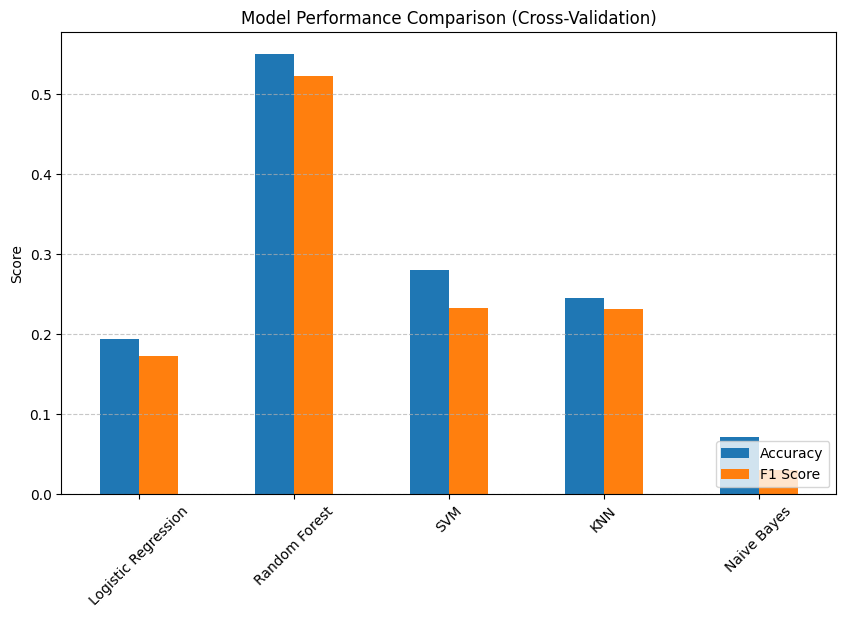

In [7]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# ================================
# 2. Load Dataset
# ================================
df = pd.read_csv(r"D:\IPL__DATASET\archive\matches.csv")

# Target column
y = df['winner']

# Drop useless columns
X = df.drop(['id','date','winner','player_of_match','result','venue'], axis=1)

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Encode target
y = LabelEncoder().fit_transform(y.astype(str))

# ================================
# 3. Handle Missing Values
# ================================
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# Scale features (for SVM/KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ================================
# 4. Define Models
# ================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# ================================
# 5. Cross-Validation
# ================================
results = {}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    acc = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    f1 = cross_val_score(model, X_scaled, y, cv=kfold, scoring='f1_weighted')
    results[name] = {
        "Accuracy": np.mean(acc),
        "F1 Score": np.mean(f1)
    }

# ================================
# 6. Results Table
# ================================
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n")
print(results_df)

# ================================
# 7. Visualization
# ================================
results_df[["Accuracy","F1 Score"]].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison (Cross-Validation)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [10]:
import pandas as pd

# Dataset path
file_path = r"D:\IPL__DATASET\archive\matches.csv"

df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.isnull().sum())  # check missing values


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [11]:
from sklearn.preprocessing import LabelEncoder

# Drop unimportant columns
df = df.drop(["id", "date", "umpire1", "umpire2", "umpire3"], axis=1, errors="ignore")

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col].astype(str))


In [12]:
from sklearn.impute import SimpleImputer

X = df.drop("winner", axis=1)
y = df["winner"]

imputer = SimpleImputer(strategy="most_frequent")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
